In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
# upload data
print("Upload CSV")
uploaded = files.upload()

Upload CSV


Saving Copy of Hotdog Survey (Responses) - Form Responses 1 (1).csv to Copy of Hotdog Survey (Responses) - Form Responses 1 (1) (2).csv


In [ ]:
# read data into dataframe
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

In [ ]:
# clean up data
df = df[df["Are you a full-time undergraduate UVA student?"] == "Yes"]
df = df.drop(columns=["Timestamp", "Are you a full-time undergraduate UVA student?"])
df = df.rename(columns={"What year are you?": "Year", "Do you believe a hotdog is a sandwich?": "Sandwich"})

In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      76 non-null     object
 1   Sandwich  76 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB
None
  Year Sandwich
0  3rd       No
1  4th       No
2  4th       No
3  4th      Yes
4  4th      Yes


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

/tmp/ipython-input-4248423812.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Year', palette='viridis', order=year_order)


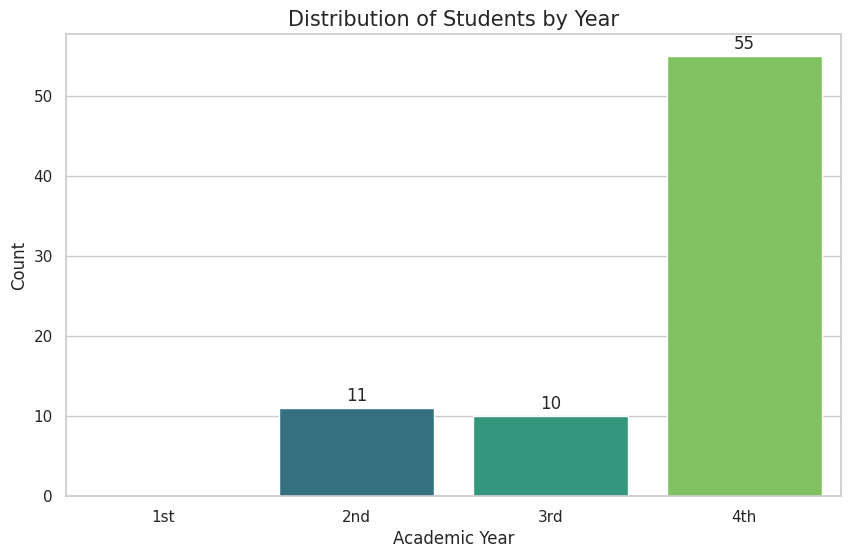

In [ ]:
plt.figure()
year_order = ['1st', '2nd', '3rd', '4th'] # Ensures chronological order
ax = sns.countplot(data=df, x='Year', palette='viridis', order=year_order)
plt.title('Distribution of Students by Year', fontsize=15)
plt.xlabel('Academic Year')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.show()

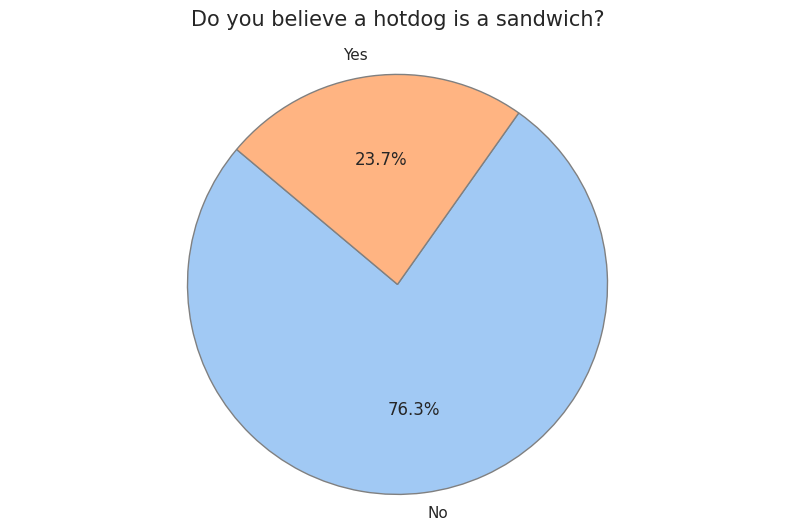

In [ ]:
plt.figure()
opinion_counts = df['Sandwich'].value_counts()
colors = sns.color_palette('pastel')[0:len(opinion_counts)]

# FIX: Moved edgecolor into the wedgeprops dictionary
plt.pie(opinion_counts,
        labels=opinion_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'gray', 'linewidth': 1})

plt.title('Do you believe a hotdog is a sandwich?', fontsize=15, pad=20)
plt.axis('equal')
plt.show()